In [1]:
pwd

'/home/jupyter/NewProject'

In [2]:
from fastai.vision import *
from fastai import *
import numpy as np
import pandas as pd
from fastai.widgets import *


In [3]:
pwd

'/home/jupyter/NewProject'

In [4]:
data_pth= '/data/train'

In [10]:
np.random.seed(40)
src= (ImageList.from_folder('data/train')
     .split_by_rand_pct(valid_pct=0.2)
     .label_from_folder()
     )

In [11]:
tfms= get_transforms(flip_vert=True)

In [12]:
data= (src.transform(tfms, size=128)
      .databunch()
      .normalize(imagenet_stats))

In [8]:
data.save()

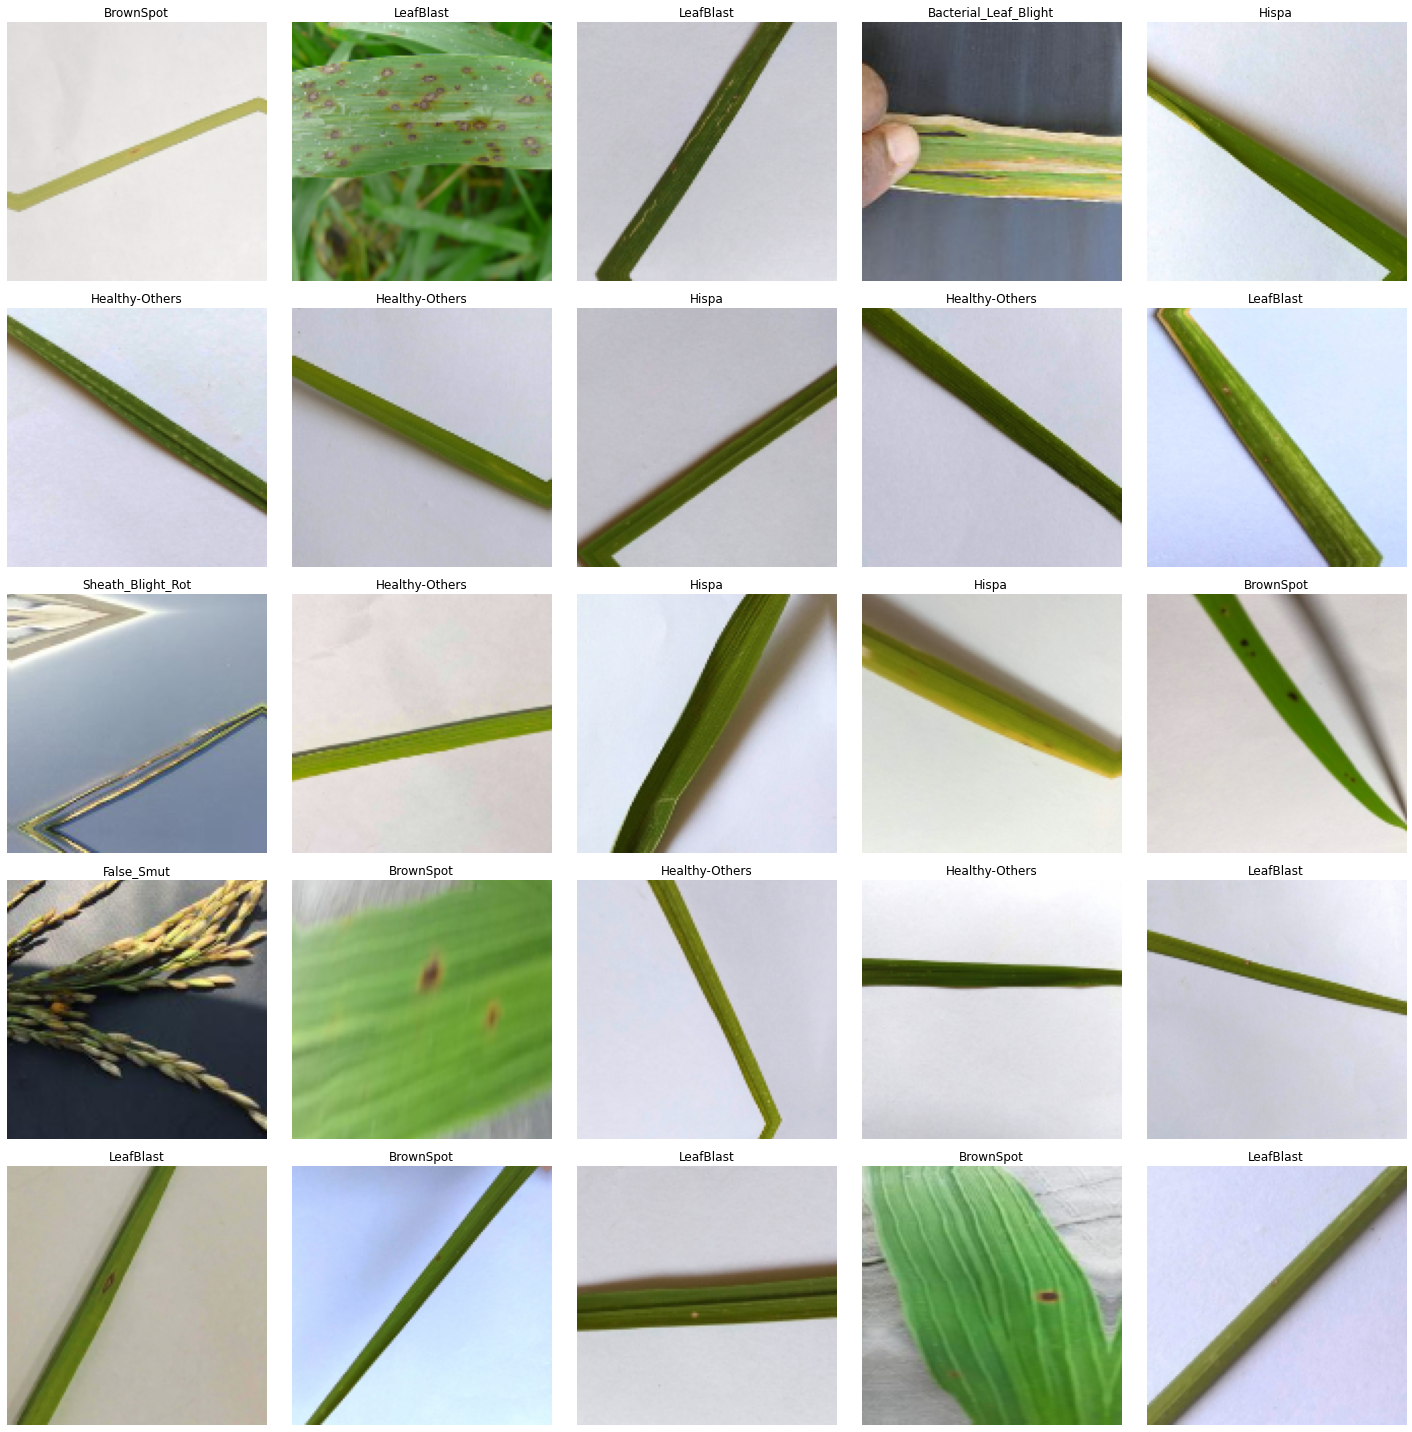

In [9]:
data.show_batch()

In [8]:
data.classes

['Bacterial_Leaf_Blight',
 'BrownSpot',
 'False_Smut',
 'Healthy-Others',
 'Hispa',
 'LeafBlast',
 'Neck_Blast',
 'Sheath_Blight_Rot']

In [9]:
arch = models.resnet50

In [10]:
len(data.train_ds), len(data.valid_ds)

(3671, 917)

In [11]:
learn= cnn_learner(data, arch, metrics=[accuracy]).to_fp16()

In [29]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


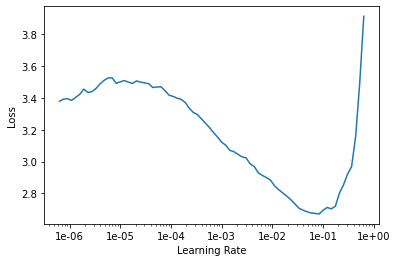

In [27]:
learn.recorder.plot()

In [14]:
lr= 1e-3

In [15]:
learn.fit_one_cycle(4, lr)

epoch,train_loss,valid_loss,accuracy,time
0,2.142709,1.389474,0.628135,02:48
1,1.635156,1.080790,0.668484,02:25
2,1.327272,0.896063,0.693566,02:18
3,1.137762,0.846879,0.712105,02:24


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


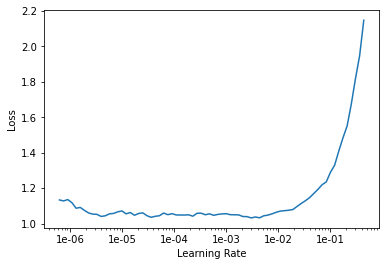

In [16]:
learn.lr_find()
learn.recorder.plot()

In [17]:
learn.fit_one_cycle(4, lr)

epoch,train_loss,valid_loss,accuracy,time
0,1.022028,0.930239,0.705562,02:16
1,1.050810,0.829284,0.723010,02:20
2,0.953925,0.724257,0.749182,02:15
3,0.882178,0.729347,0.741549,02:16


In [20]:
learn.save('stage-1-rice')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


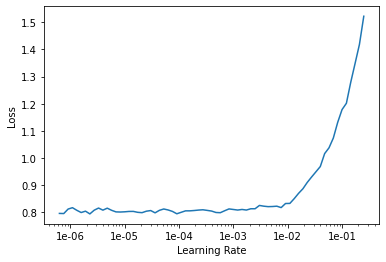

In [21]:
learn.lr_find()
learn.recorder.plot()

In [22]:
learn.unfreeze()

In [23]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


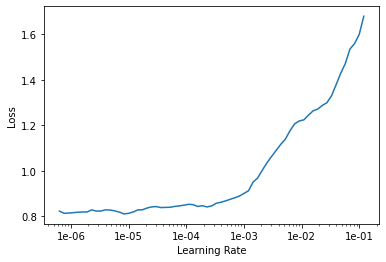

In [24]:
learn.recorder.plot()

In [26]:
learn.fit_one_cycle(4, slice(5e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.830726,0.740211,0.755725,02:25
1,0.809597,0.649559,0.767721,02:19
2,0.737327,0.596678,0.786260,02:20
3,0.662520,0.584063,0.800436,02:20


In [27]:
learn.save('stage-2-80-rice')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


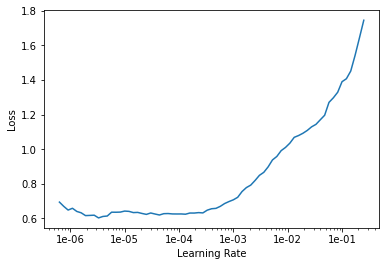

In [28]:
learn.lr_find()
learn.recorder.plot()

In [29]:
learn.fit_one_cycle(10, slice(5e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.593410,0.568645,0.800436,02:22
1,0.598964,0.594920,0.786260,02:23
2,0.625485,0.611210,0.784079,02:21
3,0.599603,0.571708,0.804798,02:19
4,0.568243,0.585221,0.794984,02:17
5,0.538934,0.543940,0.812432,02:22
6,0.491636,0.520326,0.817884,02:15
7,0.466431,0.519182,0.811341,02:17
8,0.428979,0.508927,0.825518,02:17
9,0.420556,0.505013,0.832061,02:17


In [31]:
learn.save('stage-2-83-rice')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


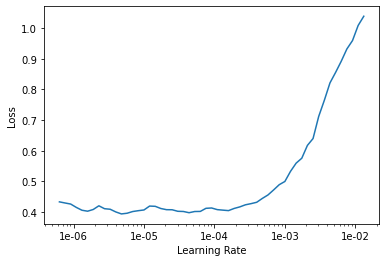

In [30]:
learn.lr_find()
learn.recorder.plot()

In [32]:
learn.fit_one_cycle(4, slice(1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.406918,0.510770,0.825518,02:23
1,0.408425,0.500792,0.832061,02:21
2,0.403130,0.502344,0.828790,02:20
3,0.387412,0.502780,0.824427,02:15


In [12]:
l_data=(src.transform(tfms, size=256)
       .add_test_folder('../Rice/RiceDiseaseDataset/valid')
       .databunch()
       .normalize(imagenet_stats))

In [14]:
l_data.save()

In [15]:
learn.data=l_data
learn.to_fp16()

Learner(data=ImageDataBunch;

Train: LabelList (3671 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
Hispa,Hispa,Hispa,Hispa,Hispa
Path: data/train;

Valid: LabelList (917 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
Healthy-Others,Healthy-Others,Healthy-Others,Neck_Blast,LeafBlast
Path: data/train;

Test: LabelList (0 items)
x: ImageList

y: EmptyLabelList

Path: data/train, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=Fa

In [12]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


KeyboardInterrupt: 

In [44]:
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


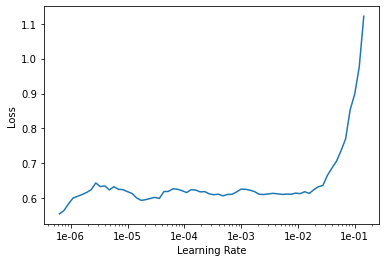

In [45]:
learn.lr_find()
learn.recorder.plot()

In [46]:
learn.fit_one_cycle(4, 1e-4)

epoch,train_loss,valid_loss,accuracy,time
0,0.631514,0.562632,0.804798,02:38
1,0.559431,0.520151,0.825518,02:38
2,0.510825,0.517376,0.821156,02:32
3,0.509144,0.517912,0.820065,02:35


In [47]:
learn.fit_one_cycle(4, 1e-4)

epoch,train_loss,valid_loss,accuracy,time
0,0.491946,0.502646,0.825518,02:33
1,0.487044,0.494453,0.825518,02:40
2,0.460576,0.479467,0.832061,02:34
3,0.453400,0.484330,0.830971,02:38


In [50]:
learn.save('model-1', return_path=True)

PosixPath('data/train/models/model-1.pth')

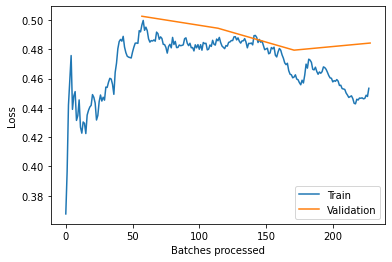

In [53]:
learn.recorder.plot_losses()

In [51]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


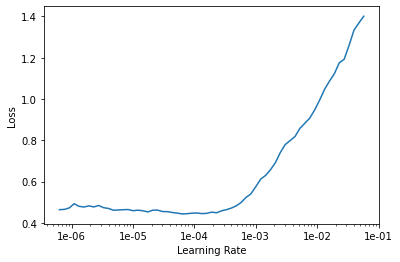

In [54]:
learn.lr_find()
learn.recorder.plot()

In [55]:
learn.fit_one_cycle(7, slice(1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.470317,0.476856,0.832061,02:37
1,0.449952,0.464445,0.828790,02:42
2,0.428542,0.459647,0.849509,02:36
3,0.401286,0.455026,0.842966,02:31
4,0.381410,0.435766,0.854962,02:33
5,0.366452,0.436022,0.846238,02:38
6,0.368428,0.435133,0.849509,02:31


In [56]:
learn.fit_one_cycle(4, slice(1e-5))

epoch,train_loss,valid_loss,accuracy,time
0,0.350710,0.438235,0.847328,02:34
1,0.359549,0.434833,0.858233,02:37
2,0.335138,0.435725,0.847328,02:39
3,0.344626,0.432902,0.854962,02:33


In [57]:
learn.save('model-2-85')

In [14]:
learn.load('model-2-85')

Learner(data=ImageDataBunch;

Train: LabelList (3671 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
Hispa,Hispa,Hispa,Hispa,Hispa
Path: data/train;

Valid: LabelList (917 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
Healthy-Others,Healthy-Others,Healthy-Others,Neck_Blast,LeafBlast
Path: data/train;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affi

In [19]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


KeyboardInterrupt: 

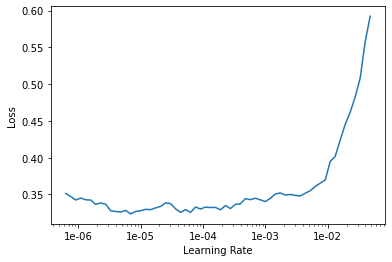

In [20]:
learn.recorder.plot()

In [20]:
learn.fit_one_cycle(6, slice(1e-5))

epoch,train_loss,valid_loss,accuracy,time
0,0.350994,0.430548,0.847328,02:48
1,0.349210,0.437251,0.848419,02:23
2,0.347275,0.434015,0.853871,02:24
3,0.347087,0.431054,0.851690,02:25
4,0.351610,0.425813,0.859324,02:20
5,0.358478,0.431410,0.849509,02:18


In [21]:
learn.fit_one_cycle(10, slice(1e-5))

epoch,train_loss,valid_loss,accuracy,time
0,0.351898,0.433914,0.857143,02:19
1,0.353974,0.431282,0.850600,02:21
2,0.344955,0.436940,0.854962,02:19
3,0.342759,0.428745,0.853871,02:19
4,0.345141,0.429347,0.849509,02:18
5,0.341772,0.433932,0.851690,02:15
6,0.345014,0.434051,0.857143,02:17
7,0.339074,0.430859,0.860414,02:20
8,0.340770,0.428516,0.852781,02:20
9,0.339299,0.430884,0.850600,02:19


In [28]:
img= open_image('../Rice/RiceDiseaseDataset/valid/Hispa/IMG_20190419_112955.jpg')
learn.predict(img)

(Category LeafBlast,
 tensor(5),
 tensor([6.4601e-04, 3.3000e-03, 3.5746e-04, 2.4986e-02, 2.5064e-01, 7.1959e-01,
         5.0206e-05, 4.3202e-04]))

In [22]:
learn.validate(l_data.valid_dl)

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f0db25cb9e0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 941, in _shutdown_workers
    w.join()
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 138, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f0db25cb9e0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 941, in _shutdown_workers
    w.join()
  File "/opt/conda/lib/python3.7/multipr

[0.4328919, tensor(0.8550)]

In [29]:
intrp= ClassificationInterpretation.from_learner(learn)

In [30]:
intrp.most_confused()

[('Hispa', 'Healthy-Others', 34),
 ('Healthy-Others', 'Hispa', 17),
 ('LeafBlast', 'BrownSpot', 13),
 ('LeafBlast', 'Healthy-Others', 12),
 ('BrownSpot', 'Healthy-Others', 10),
 ('BrownSpot', 'LeafBlast', 10),
 ('LeafBlast', 'Hispa', 10),
 ('Hispa', 'LeafBlast', 7),
 ('Healthy-Others', 'BrownSpot', 4),
 ('Hispa', 'BrownSpot', 4),
 ('Healthy-Others', 'LeafBlast', 3),
 ('Bacterial_Leaf_Blight', 'Hispa', 1),
 ('Bacterial_Leaf_Blight', 'Sheath_Blight_Rot', 1),
 ('BrownSpot', 'Bacterial_Leaf_Blight', 1),
 ('Healthy-Others', 'Sheath_Blight_Rot', 1),
 ('Hispa', 'Bacterial_Leaf_Blight', 1),
 ('Sheath_Blight_Rot', 'Bacterial_Leaf_Blight', 1),
 ('Sheath_Blight_Rot', 'False_Smut', 1),
 ('Sheath_Blight_Rot', 'Healthy-Others', 1),
 ('Sheath_Blight_Rot', 'Hispa', 1)]

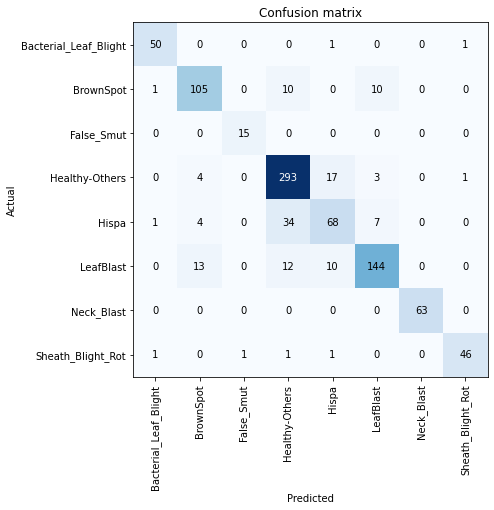

In [38]:
intrp.plot_confusion_matrix(slice_size=1, figsize=[7, 7])

In [41]:
classlist=['LeafBlast', 'BrownSpot','Healthy-Others', 'Hispa']

In [44]:
ClassConfusion(intrp, classlist, is_ordered=False, figsize=(8,8))

Please enter a value for `k`, or the top images you will see:  5


100%|██████████| 11/11 [05:55<00:00, 32.29s/it]


<Figure size 432x288 with 0 Axes>

In [47]:
ds, idxs = DatasetFormatter().from_toplosses(learn)

In [56]:
ImageCleaner(ds, idxs, path='.')

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [16]:
learn.export()

## New Trial

In [7]:
np.random.seed(42)
src= (ImageList.from_folder('data/train')
     .split_by_rand_pct(valid_pct=0.2)
     .label_from_folder())

In [8]:
tfms= get_transforms(flip_vert=True)

In [16]:
new_data=(src.transform(tfms, size=244)
     .databunch(bs=64))

In [13]:
arch= models.resnet50

In [17]:
learn= cnn_learner(new_data, arch, metrics=[accuracy]).to_fp16()

In [18]:
learn.load('model-2-85')

Learner(data=ImageDataBunch;

Train: LabelList (1956 items)
x: ImageList
Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244)
y: CategoryList
Hispa,Hispa,Hispa,Hispa,Hispa
Path: data/train;

Valid: LabelList (488 items)
x: ImageList
Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244)
y: CategoryList
Neck_Blast,BrownSpot,LeafBlast,Neck_Blast,False_Smut
Path: data/train;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, trac

In [19]:
new_data.classes

['Bacterial_Leaf_Blight',
 'BrownSpot',
 'False_Smut',
 'Healthy',
 'Hispa',
 'LeafBlast',
 'Neck_Blast',
 'Sheath_Blight_Rot']

In [20]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [24]:
len(new_data.train_ds), len(new_data.valid_ds)

(1956, 488)

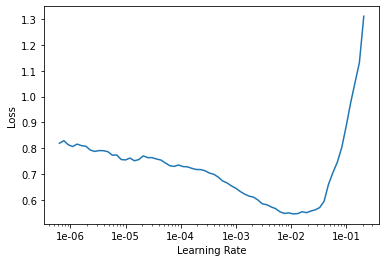

In [25]:
learn.recorder.plot()

In [26]:
learn.fit_one_cycle(4, 5e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.360616,0.240378,0.909836,00:40
1,0.334276,0.430541,0.891393,00:39
2,0.308805,0.210266,0.928279,00:38
3,0.237777,0.162835,0.946721,00:39


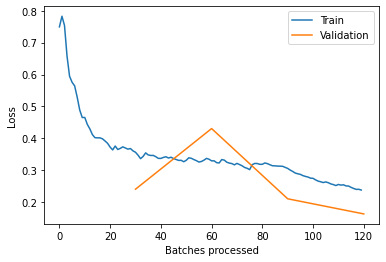

In [27]:
learn.recorder.plot_losses()

In [28]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


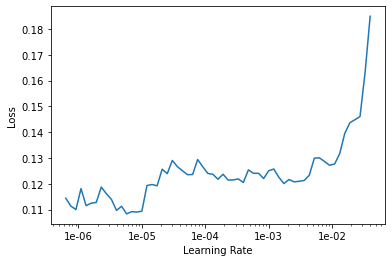

In [29]:
learn.recorder.plot()

In [30]:
intrp= ClassificationInterpretation.from_learner(learn)

In [31]:
intrp.most_confused()

[('BrownSpot', 'LeafBlast', 8),
 ('BrownSpot', 'Bacterial_Leaf_Blight', 3),
 ('BrownSpot', 'Healthy', 3),
 ('Healthy', 'BrownSpot', 3),
 ('False_Smut', 'BrownSpot', 2),
 ('Healthy', 'Bacterial_Leaf_Blight', 2),
 ('Bacterial_Leaf_Blight', 'BrownSpot', 1),
 ('Bacterial_Leaf_Blight', 'LeafBlast', 1),
 ('Bacterial_Leaf_Blight', 'Sheath_Blight_Rot', 1),
 ('LeafBlast', 'Healthy', 1),
 ('Sheath_Blight_Rot', 'Healthy', 1)]

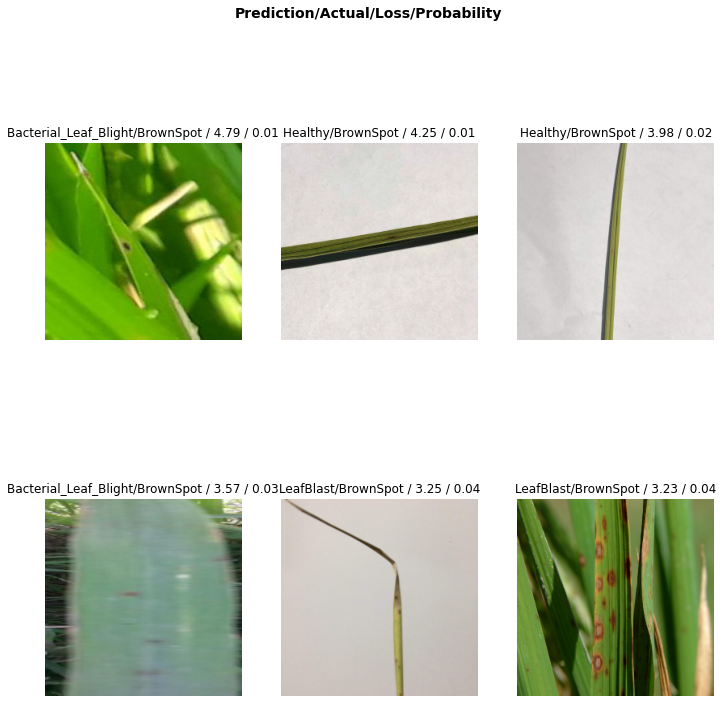

In [34]:
intrp.plot_top_losses(6)

In [35]:
learn.fit_one_cycle(4, 1e-5)

epoch,train_loss,valid_loss,accuracy,time
0,0.135073,0.161435,0.944672,00:38
1,0.145527,0.163469,0.944672,00:39
2,0.131193,0.162957,0.942623,00:40
3,0.130293,0.162738,0.944672,00:39


In [36]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


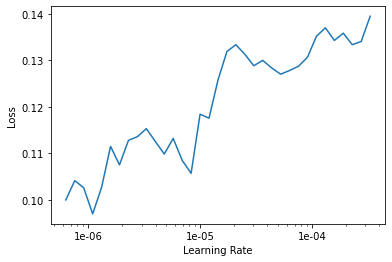

In [37]:
learn.lr_find()
learn.recorder.plot()

In [38]:
learn.fit_one_cycle(4, slice(1e-5))

epoch,train_loss,valid_loss,accuracy,time
0,0.137247,0.161399,0.944672,00:39
1,0.135388,0.155731,0.942623,00:39
2,0.125347,0.156474,0.946721,00:39
3,0.124081,0.162218,0.942623,00:41


In [39]:
intrp= ClassificationInterpretation.from_learner(learn)
intrp.most_confused()

[('BrownSpot', 'LeafBlast', 8),
 ('BrownSpot', 'Bacterial_Leaf_Blight', 3),
 ('BrownSpot', 'Healthy', 3),
 ('Healthy', 'BrownSpot', 3),
 ('False_Smut', 'BrownSpot', 2),
 ('Healthy', 'Bacterial_Leaf_Blight', 2),
 ('Bacterial_Leaf_Blight', 'BrownSpot', 1),
 ('Bacterial_Leaf_Blight', 'LeafBlast', 1),
 ('Bacterial_Leaf_Blight', 'Sheath_Blight_Rot', 1),
 ('Healthy', 'Sheath_Blight_Rot', 1),
 ('LeafBlast', 'BrownSpot', 1),
 ('LeafBlast', 'Healthy', 1),
 ('Sheath_Blight_Rot', 'Healthy', 1)]

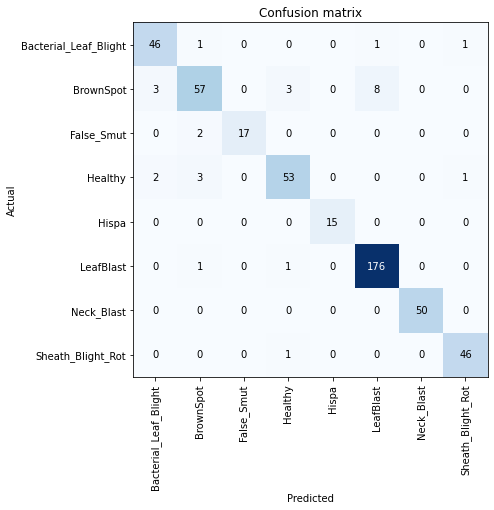

In [44]:
intrp.plot_confusion_matrix(figsize=[7,7])

In [46]:
learn.export('RiceClassifier.pkl')